In [11]:
import numpy as np
import pandas as pd

obj = """
    {"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
                  {"name": "Katie", "age": 38,
                   "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
obj


'\n    {"name": "Wes",\n"places_lived": ["United States", "Spain", "Germany"],\n"pet": null,\n"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},\n                  {"name": "Katie", "age": 38,\n                   "pets": ["Sixes", "Stache", "Cisco"]}]\n}\n'

In [12]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [13]:
result['siblings'][0]['name']

'Scott'

In [14]:
result['siblings'][0]['age']

30

In [15]:
result['siblings'][1]['age']

38

In [16]:
import urllib3
import certifi
import json

url='https://opendata.cwb.gov.tw/fileapi/v1/opendataapi/O-A0001-001?Authorization=rdec-key-123-45678-011121314&format=JSON'

http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED',ca_certs=certifi.where())
response = http.request('GET',url)
if response.status == 200:
    downloadData = json.loads(response.data.decode('utf-8'))
else:
    print("下載錯誤")



In [17]:
openData = downloadData['cwbopendata']['location']

In [18]:
usefulData = [];
for location in openData:
    oneLocation = {};
    oneLocation['縣市'] = location['parameter'][0]['parameterValue']
    oneLocation['區域'] = location['parameter'][2]['parameterValue']
    oneLocation['時間'] = location['time']['obsTime']
    oneLocation['溫度'] = location['weatherElement'][3]['elementValue']['value']
    usefulData.append(oneLocation)

In [24]:
import pandas as pd
temperature = pd.DataFrame(usefulData)
temperature.tail(20)

,縣市,區域,時間,溫度
420,嘉義縣,民雄鄉,2020-04-19T15:00:00+08:00,31.0
421,雲林縣,大埤鄉,2020-04-19T15:00:00+08:00,30.1
422,雲林縣,莿桐鄉,2020-04-19T15:00:00+08:00,30.4
423,彰化縣,竹塘鄉,2020-04-19T15:00:00+08:00,29.5
424,雲林縣,臺西鄉,2020-04-19T15:00:00+08:00,27.5
425,雲林縣,水林鄉,2020-04-19T15:00:00+08:00,28.6
426,雲林縣,元長鄉,2020-04-19T15:00:00+08:00,29.5
427,嘉義縣,布袋鎮,2020-04-19T15:00:00+08:00,27.7
428,嘉義縣,鹿草鄉,2020-04-19T15:00:00+08:00,29.8
429,嘉義縣,六腳鄉,2020-04-19T15:00:00+08:00,29.1


In [25]:
#Excel檔案
#使用pd.ExcelFile()
xlsx = pd.ExcelFile('ex1.xlsx')
pd.read_excel(xlsx,'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [28]:
#Excel檔案
#使用pd.ExcelFile()
xlsx = pd.ExcelFile('總統.xls')
pd.read_excel(xlsx,'中　央')

,第14任總統、副總統選舉候選人得票數一覽表,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,行政區別,各組候選人得票情形,NaN,NaN,有效票數A\nA=1+2+...+N,無效票數B,投票數C\nC=A+B,已領未投票數D\nD=E-C,發出票數E\nE=C+D,用餘票數F,選舉人數G\nG=E+F,投票率H\nH=C÷G
1,NaN,(1)\n朱立倫\n王如玄,(2)\n蔡英文\n陳建仁,(3)\n宋楚瑜\n徐欣瑩,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,總 計,3813365,6894744,1576861,12284970,163332,12448302,291,12448593,6334398,18782991,66.27
5,臺北市,546491,757383,153804,1457678,22540,1480218,73,1480291,695695,2175986,68.03
6,新北市,709374,1165888,252486,2127748,26481,2154229,50,2154279,1050088,3204367,67.23
7,桃園市,369013,547573,156518,1073104,11898,1085002,8,1085010,542588,1627598,66.66
8,臺中市,430005,793281,218810,1442096,19800,1461896,41,1461937,676582,2138519,68.36
9,臺南市,219196,670608,103432,993236,12457,1005693,16,1005709,522537,1528246,65.81


In [38]:
import requests

url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
response = requests.get(url)
if response.status_code == 200:
    data=response.json()
    
else:
    print('失敗')

issues = pd.DataFrame(data,columns=['number', 'title', 'labes', 'state'])
issues




,number,title,labes,state
0,33648,DOC: convert_dtypes method is not converted to...,NaN,open
1,33647,Most idiomatic way to set freq of Datetime Ind...,NaN,open
2,33646,BUG/API: getitem behavior with list match ndar...,NaN,open
3,33645,IO: Fix S3 Error Handling,NaN,open
4,33644,BUG: Groupby quantiles incorrect bins #33200,NaN,open
5,33643,"REF: dispatch Series.__setitem__ to loc/iloc, ...",NaN,open
6,33642,API: Series[index_with_no_matches] vs Series[l...,NaN,open
7,33641,CLN: remove unnecessary non-scalar code in may...,NaN,open
8,33639,use s3fs authentication if provided,NaN,open
9,33638,add test for former bug (appeared in 0.24.2 bu...,NaN,open


In [39]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import requests
url = 'http://api.openweathermap.org/data/2.5/group?id=1668341,1668399,1670481&units=metric&appid=29c4f184354b9889e87f7b494ac86aed'
resp = requests.get(url)
resp
weatherData = resp.json()
weatherDict = {}
lon = []
lat = []
temp = []
humidity = []
name = []
for item in weatherData['list']:
    lon.append(item['coord']['lon'])
    lat.append(item['coord']['lat'])
    temp.append(item['main']['temp'])
    humidity.append(item['main']['humidity'])
    name.append(item['name'])

weatherDict['城市'] = name
weatherDict['緯度'] = lat
weatherDict['經度'] = lon
weatherDict['攝氏'] = temp
weatherDict['溼度'] = humidity
weatherDict
weatherDataFrame = pd.DataFrame(weatherDict,columns=['攝氏', '溼度','緯度', '經度'],index=weatherDict['城市'])
weatherDataFrame


,攝氏,溼度,緯度,經度
Taipei,27.32,83,25.05,121.53
Taichung,28.49,78,24.15,120.68
Pingtung,28.76,74,22.67,120.49


<IPython.core.display.Javascript object>


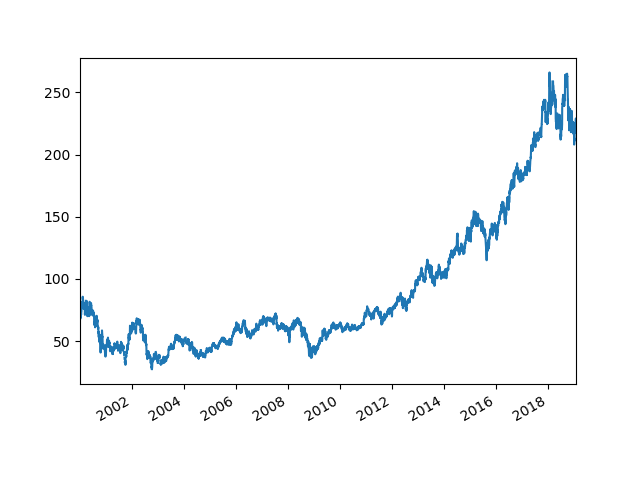

In [43]:
#台績電指數
import requests
import pandas as pd
import json
import numpy as np

url = "https://query1.finance.yahoo.com/v8/finance/chart/2330.TW?period1=0&period2=1549258857&interval=1d&events=history&=hP2rOschxO0"

res = requests.get(url)
data = json.loads(res.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
df.tail(20)
df['close'].plot()